# Initial plots with dynamics

## Author(s): Sven Buder (SB, WG4)

### History:
180926 SB Created

In [3]:
# Preamble for notebook 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import os
import sys
import glob
import pickle
import pandas

# Packages to work with FITS and (IDL) SME.out files
import astropy.io.fits as pyfits
import astropy.table as table
from scipy.io.idl import readsav

# Matplotlib and associated packages for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.transforms import Bbox,TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
from matplotlib._png import read_png
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

params = {
    'font.family'        : 'sans',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]
parula_0 = ListedColormap(_parula_data, name='parula_0')
parula_0.set_bad((1,1,1))
parula_r = ListedColormap(_parula_data[::-1], name='parula_r')

willi_blau = [0.0722666667, 0.4886666667, 0.8467]

In [4]:
#dynamics = pyfits.getdata('sobject_dynamic.fits',1)
#sobject_iraf = pyfits.getdata('../input/sobject_iraf_53_2MASS_GaiaDR2_WISE_PanSTARRSDR1_BailerJones_K2seis.fits',1)

dynamics = pyfits.getdata('sobject_dynamics_65k.fits',1)
sobject_iraf = pyfits.getdata('../data_products/GALAH_iDR3_combined_10k.fits',1)

In [5]:
# from galpy.potential import MWPotential2014
# from astropy import units as u

# energies = np.zeros(len(dynamics))

# for each_index in np.arange(10000):
#     dyn = dynamics[each_index]

#     s = orbit.Orbit([dyn['R_Rzphi']*u.kpc,dyn['vR_Rzphi']*u.km/u.s,dyn['vphi_Rzphi']*u.km/u.s,dyn['z_Rzphi']*u.kpc,dyn['vz_Rzphi']*u.km/u.s,dyn['phi_Rzphi']*u.rad]) #R,vR,vT(,z,vz,phi)
#     s.integrate(t=np.linspace(0,2,100)*u.Gyr, pot=MWPotential2014)
#     energies[each_index] = s.E()

In [6]:
# plt.hist2d(
#     dynamics['L_Z'][good_dynamics],
#     energies[good_dynamics],
#     bins=50,cmin=1
# );
# plt.axhline(-1.8*10**5)
# plt.tight_layout()

In [7]:
#galpy scale units:                                                                                                                                                                                         
_REFR0 = 8.178   #[kpc]  --> galpy length unit                                                                                                                                                                 
_REFV0 = 229. #[km/s] --> galpy velocity unit

### Plot everything (including stars with bad dynamics)

### Plot clean sample

In [8]:
import galpy

In [9]:
from galpy import orbit

In [10]:
good_dynamics = (
    np.isfinite(dynamics['L_Z']) & 
    #(dynamics['L_Z'] < 150) &
#    (sobject_iraf['RUWE'] < 1.4) &
#    (sobject_iraf['r_est'] < 8000) &
    np.isfinite(dynamics['zmax'])
    )

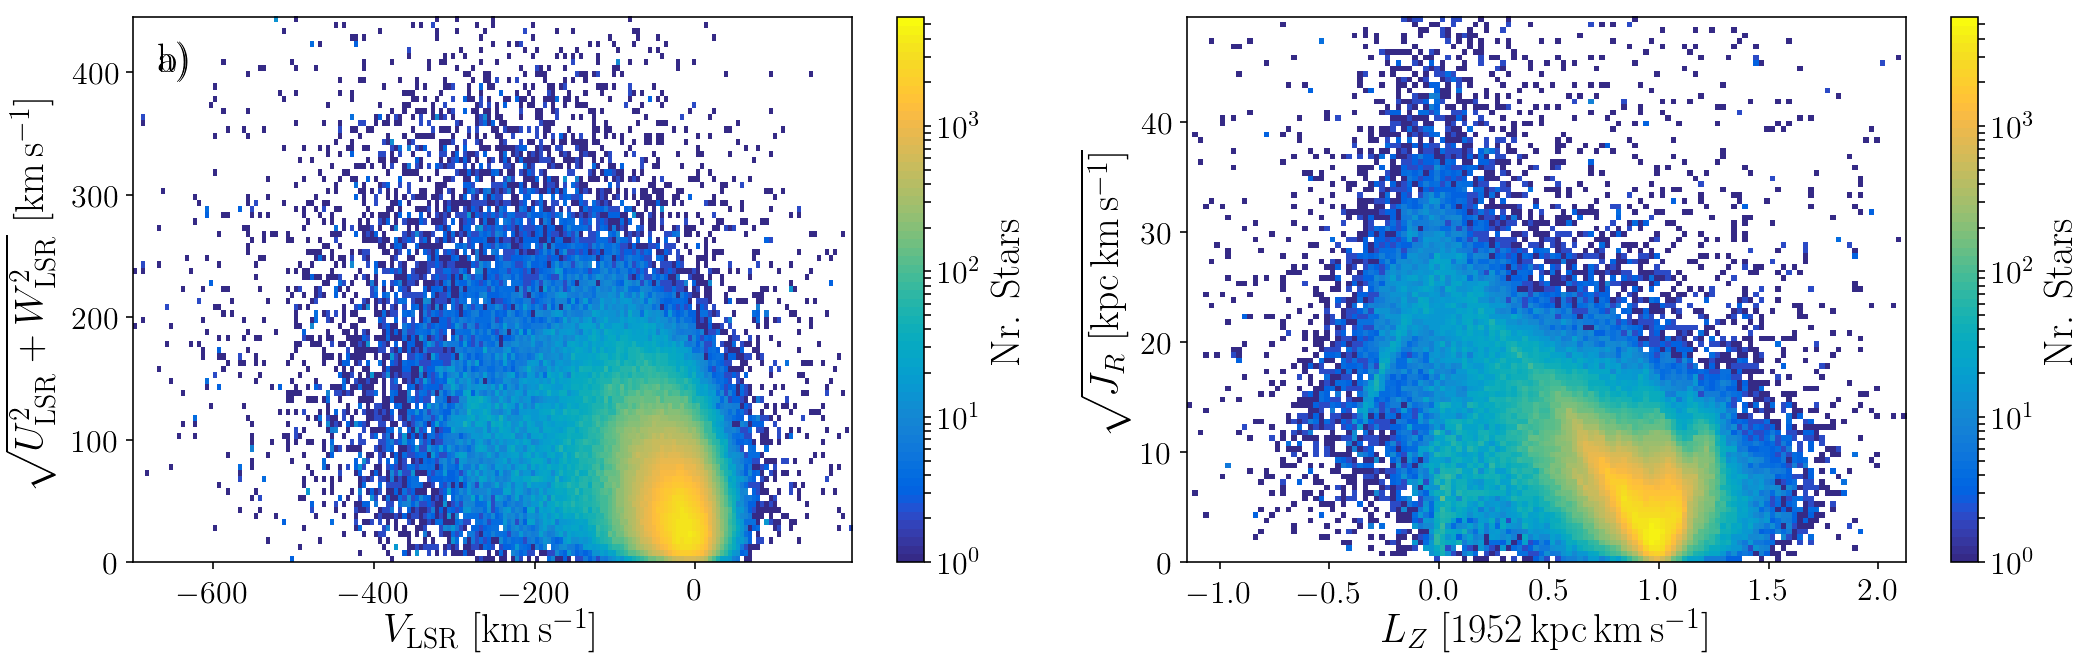

In [11]:
# Plot clean sample 

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

kwargs_hist2d = dict(
    cmin=1,
    cmap=parula,
    norm=LogNorm(),
    rasterized=True
    )

p1, x1, y1, s1 = ax1.hist2d(
    dynamics['V_LSR'][good_dynamics],
    np.sqrt(dynamics['U_LSR'][good_dynamics]**2. + dynamics['W_LSR'][good_dynamics]**2.),
    bins = (
        np.arange(-700,200,5),
        np.arange(0,450,5)
    ),
    vmax=10**3.75,
    **kwargs_hist2d
    )
c1 = plt.colorbar(s1, ax=ax1)
c1.set_label('Nr. Stars')

p2, x2, y2, s2 = ax2.hist2d(
    dynamics['L_Z'][good_dynamics]/(_REFR0*_REFV0),
    np.sqrt(dynamics['J_R'][good_dynamics]),
    bins = (
        np.arange(-1.15,2.15,0.025),
        np.arange(0,50,0.5)
    ),
    vmax=10**3.75,
    **kwargs_hist2d
    )
c2 = plt.colorbar(s2, ax=ax2)
c2.set_label('Nr. Stars')

# ellipse = matplotlib.patches.Ellipse(xy = (-1.5,3150), width = 0.7, height = 1000, angle = 0.05, lw = 3, fc='None', edgecolor = 'r')
# ax1.add_artist(ellipse)
# ax1.text(0.26,0.7,'LMC',transform=ax1.transAxes,color='r',fontsize=20)

ax1.set_xlabel(r'$V_\text{LSR}~\mathrm{[km\,s^{-1}]}$')
ax1.set_ylabel(r'$\sqrt{U_\text{LSR}^2 + W_\text{LSR}^2}~\mathrm{[km\,s^{-1}]}$')
ax2.set_xlabel(r'$L_Z~\mathrm{[1952\,kpc\,km\,s^{-1}]}$')
ax2.set_ylabel(r'$\sqrt{J_R~\mathrm{[kpc\,km\,s^{-1}]}}$')

ax1.text(0.035,0.9,'a)',fontsize=20, transform=ax1.transAxes)
ax2.text(0.035,0.9,'b)',fontsize=20, transform=ax1.transAxes)

plt.tight_layout()
plt.savefig('figures/action_overview_clean_all.png',dpi=200)

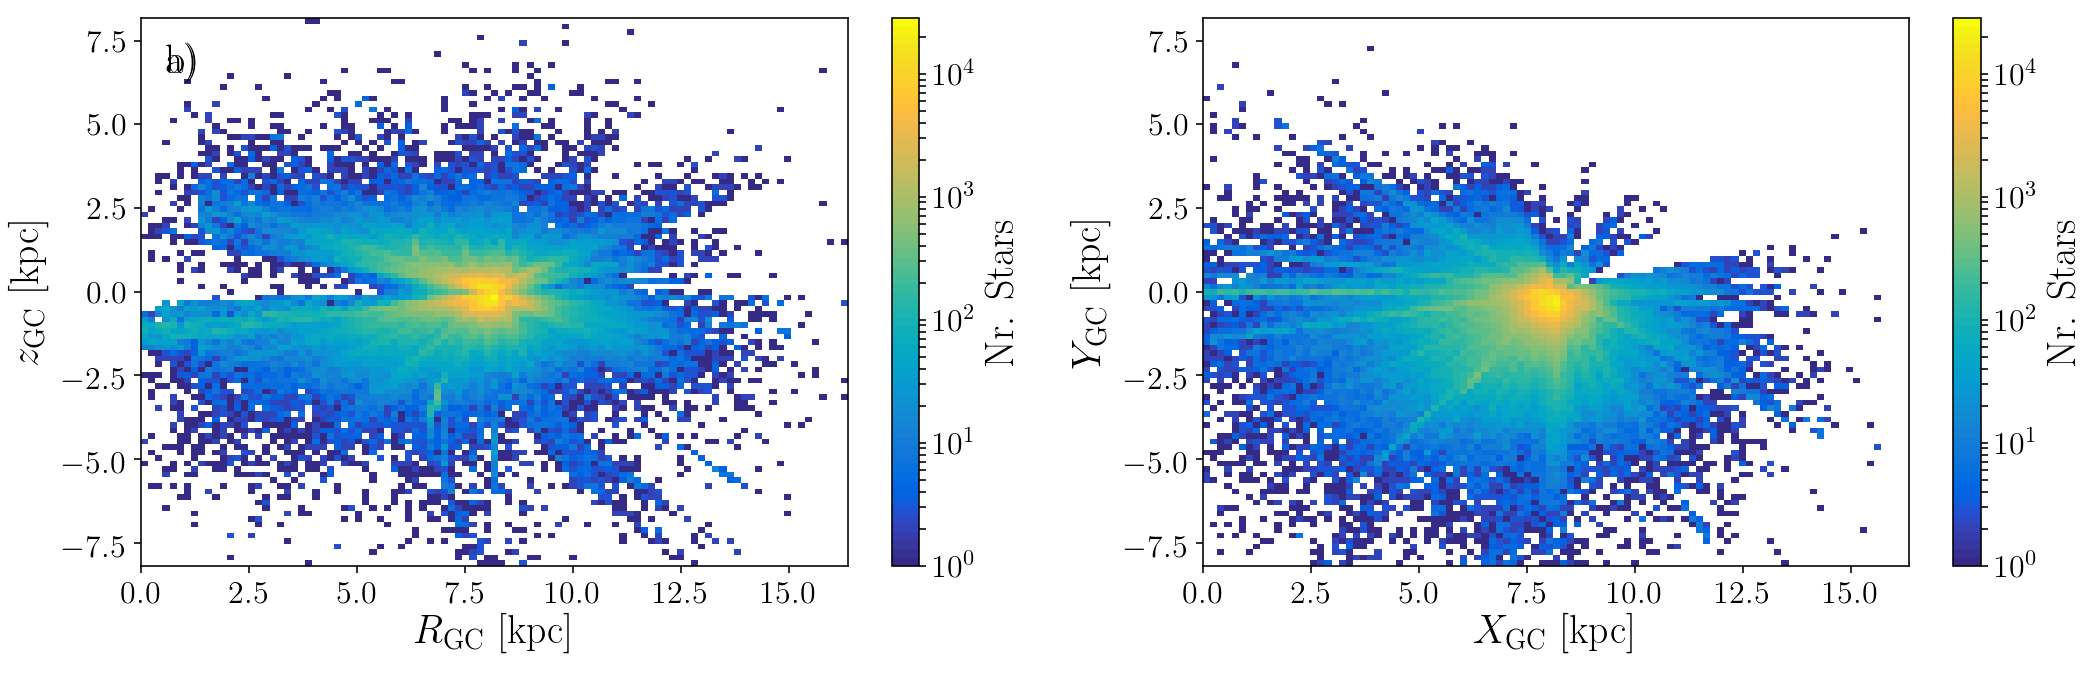

In [31]:
# Plot clean sample

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

kwargs_hist2d = dict(
    cmin=1,
    cmap=parula,
    norm=LogNorm(),
    rasterized=True
    )

p1, x1, y1, s1 = ax1.hist2d(
    dynamics['R_Rzphi'][good_dynamics],
    dynamics['z_Rzphi'][good_dynamics],
    bins = (
        np.linspace(0,2*8.178,100),
        np.linspace(-8.178,8.178,100),
    ),
    #vmax=10**3.75,
    **kwargs_hist2d
    )
c1 = plt.colorbar(s1, ax=ax1)
c1.set_label('Nr. Stars')

p2, x2, y2, s2 = ax2.hist2d(
    8.178 - dynamics['X_XYZ'][good_dynamics],
    dynamics['Y_XYZ'][good_dynamics],
    bins = (
        np.linspace(0,2*8.178,100),
        np.linspace(-8.178,8.178,100),
    ),
    #vmax=10**3.75,
    **kwargs_hist2d
    )
c2 = plt.colorbar(s2, ax=ax2)
c2.set_label('Nr. Stars')

# ellipse = matplotlib.patches.Ellipse(xy = (-1.5,3150), width = 0.7, height = 1000, angle = 0.05, lw = 3, fc='None', edgecolor = 'r')
# ax1.add_artist(ellipse)
# ax1.text(0.26,0.7,'LMC',transform=ax1.transAxes,color='r',fontsize=20)

ax1.set_xlabel(r'$R_\text{GC}~\mathrm{[kpc]}$')
ax1.set_ylabel(r'$z_\text{GC}~\mathrm{[kpc]}$')
ax2.set_xlabel(r'$X_\text{GC}~\mathrm{[kpc]}$')
ax2.set_ylabel(r'$Y_\text{GC}~\mathrm{[kpc]}$')

ax1.text(0.035,0.9,'a)',fontsize=20, transform=ax1.transAxes)
ax2.text(0.035,0.9,'b)',fontsize=20, transform=ax1.transAxes)

plt.tight_layout()
plt.savefig('figures/coords_overview_clean_all.png',dpi=300)

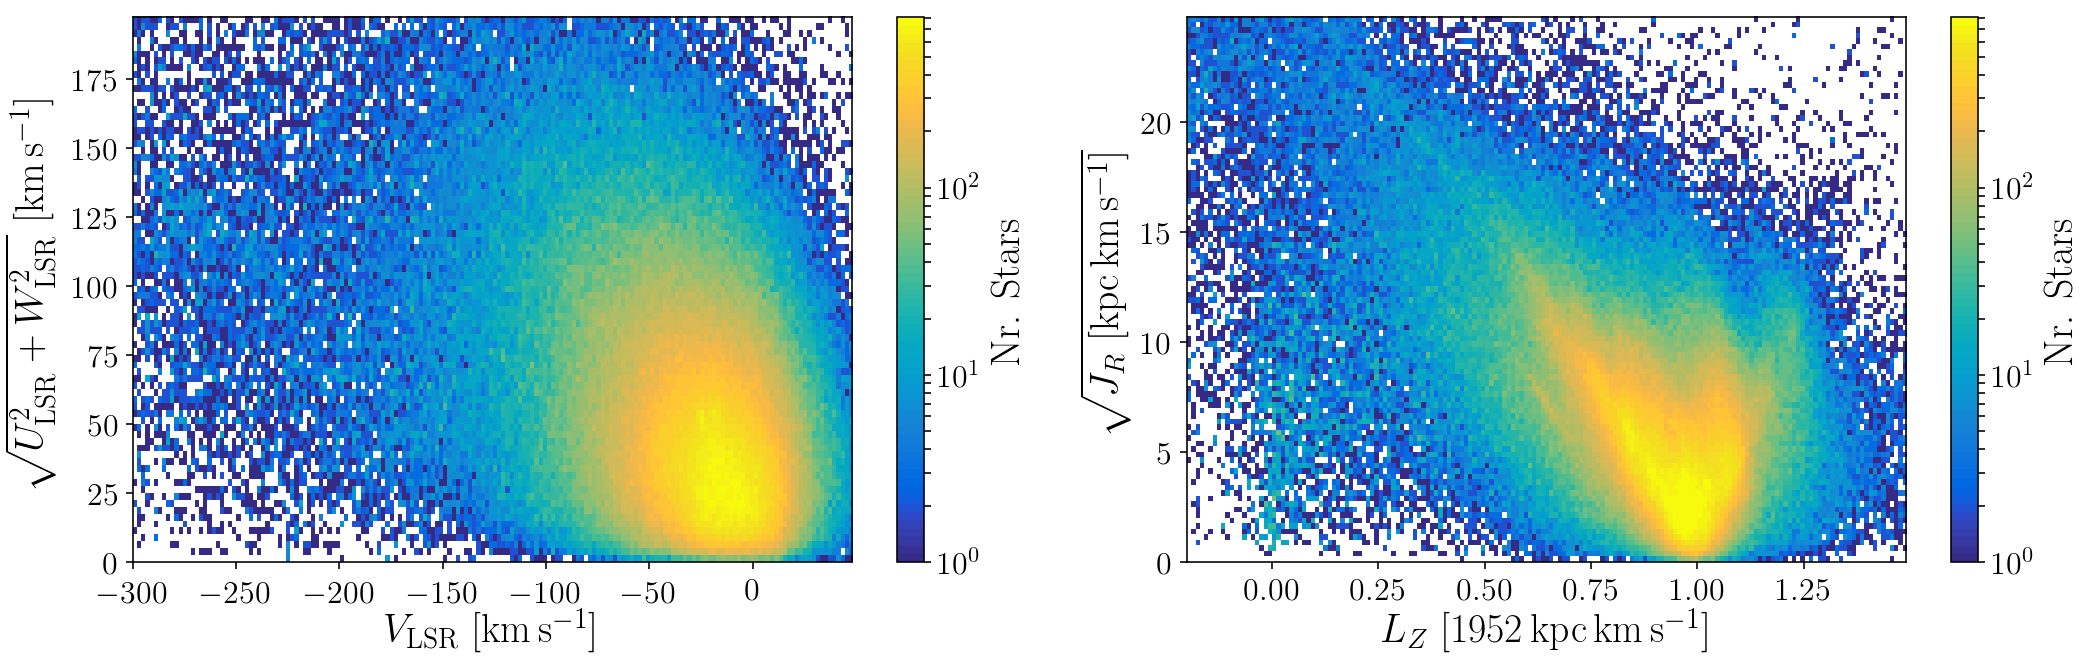

In [32]:
# Plot clean sample

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

kwargs_hist2d = dict(
    cmin=1,
    cmap=parula,
    norm=LogNorm(),
    rasterized=True
    )

p1, x1, y1, s1 = ax1.hist2d(
    dynamics['V_LSR'][good_dynamics],
    np.sqrt(dynamics['U_LSR'][good_dynamics]**2. + dynamics['W_LSR'][good_dynamics]**2.),
    bins = (
        np.arange(-300,50,2),
        np.arange(0,200,2.5)
    ),
    **kwargs_hist2d
    )
c1 = plt.colorbar(s1, ax=ax1)
c1.set_label('Nr. Stars')

p2, x2, y2, s2 = ax2.hist2d(
    dynamics['L_Z'][good_dynamics]/(_REFR0*_REFV0),
    np.sqrt(dynamics['J_R'][good_dynamics]),
    bins = (
        np.arange(-0.2,1.5,0.01),
        np.arange(0,25,0.25)
    ),
    **kwargs_hist2d
    )
c2 = plt.colorbar(s2, ax=ax2)
c2.set_label('Nr. Stars')

# ellipse = matplotlib.patches.Ellipse(xy = (-1.5,3150), width = 0.7, height = 1000, angle = 0.05, lw = 3, fc='None', edgecolor = 'r')
# ax1.add_artist(ellipse)
# ax1.text(0.26,0.7,'LMC',transform=ax1.transAxes,color='r',fontsize=20)

ax1.set_xlabel(r'$V_\text{LSR}~\mathrm{[km\,s^{-1}]}$')
ax1.set_ylabel(r'$\sqrt{U_\text{LSR}^2 + W_\text{LSR}^2}~\mathrm{[km\,s^{-1}]}$')
ax2.set_xlabel(r'$L_Z~\mathrm{[1952\,kpc\,km\,s^{-1}]}$')
ax2.set_ylabel(r'$\sqrt{J_R~\mathrm{[kpc\,km\,s^{-1}]}}$')

plt.tight_layout()
plt.savefig('figures/action_overview_clean_0_200pc.png',dpi=300)

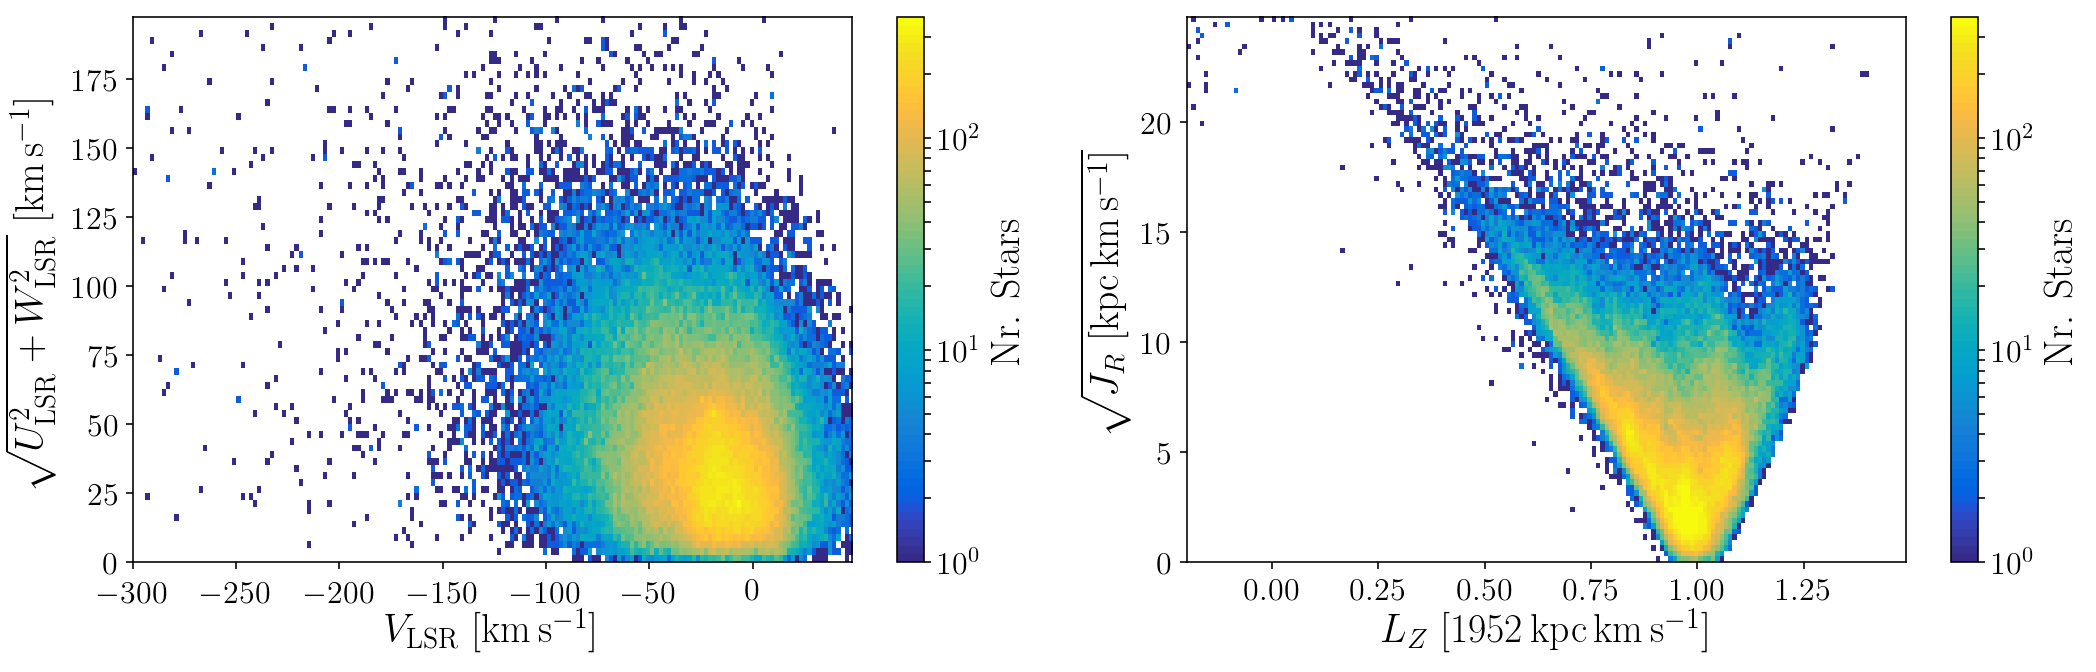

In [34]:
# Plot clean sample

good_dynamics = (
    (sobject_iraf['r_est'] > 200) & (sobject_iraf['r_est'] < 600) & 
    np.isfinite(dynamics['L_Z']) & 
    #(sobject_iraf['astrometric_excess_noise_sig'] < 1) & 
    (np.sqrt(sobject_iraf['e_rv_guess']**2. + 0.1**2.) < 0.5) & 
    (np.abs(sobject_iraf['pmra_error']/sobject_iraf['pmra']) < 0.2) & 
    (np.abs(sobject_iraf['pmdec_error']/sobject_iraf['pmdec']) < 0.2)& 
    (np.abs(sobject_iraf['parallax_error']/sobject_iraf['parallax']) < 0.2)
    )

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

kwargs_hist2d = dict(
    cmin=1,
    cmap=parula,
    norm=LogNorm(),
    rasterized=True
    )

p1, x1, y1, s1 = ax1.hist2d(
    dynamics['V_LSR'][good_dynamics],
    np.sqrt(dynamics['U_LSR'][good_dynamics]**2. + dynamics['W_LSR'][good_dynamics]**2.),
    bins = (
        np.arange(-300,50,2),
        np.arange(0,200,2.5)
    ),
    **kwargs_hist2d
    )
c1 = plt.colorbar(s1, ax=ax1)
c1.set_label('Nr. Stars')

p2, x2, y2, s2 = ax2.hist2d(
    dynamics['L_Z'][good_dynamics]/(_REFR0*_REFV0),
    np.sqrt(dynamics['J_R'][good_dynamics]),
    bins = (
        np.arange(-0.2,1.5,0.01),
        np.arange(0,25,0.25)
    ),
    **kwargs_hist2d
    )
c2 = plt.colorbar(s2, ax=ax2)
c2.set_label('Nr. Stars')

# ellipse = matplotlib.patches.Ellipse(xy = (-1.5,3150), width = 0.7, height = 1000, angle = 0.05, lw = 3, fc='None', edgecolor = 'r')
# ax1.add_artist(ellipse)
# ax1.text(0.26,0.7,'LMC',transform=ax1.transAxes,color='r',fontsize=20)

ax1.set_xlabel(r'$V_\text{LSR}~\mathrm{[km\,s^{-1}]}$')
ax1.set_ylabel(r'$\sqrt{U_\text{LSR}^2 + W_\text{LSR}^2}~\mathrm{[km\,s^{-1}]}$')
ax2.set_xlabel(r'$L_Z~\mathrm{[1952\,kpc\,km\,s^{-1}]}$')
ax2.set_ylabel(r'$\sqrt{J_R~\mathrm{[kpc\,km\,s^{-1}]}}$')

plt.tight_layout()
plt.savefig('figures/action_overview_clean_200_600pc.png',dpi=300)

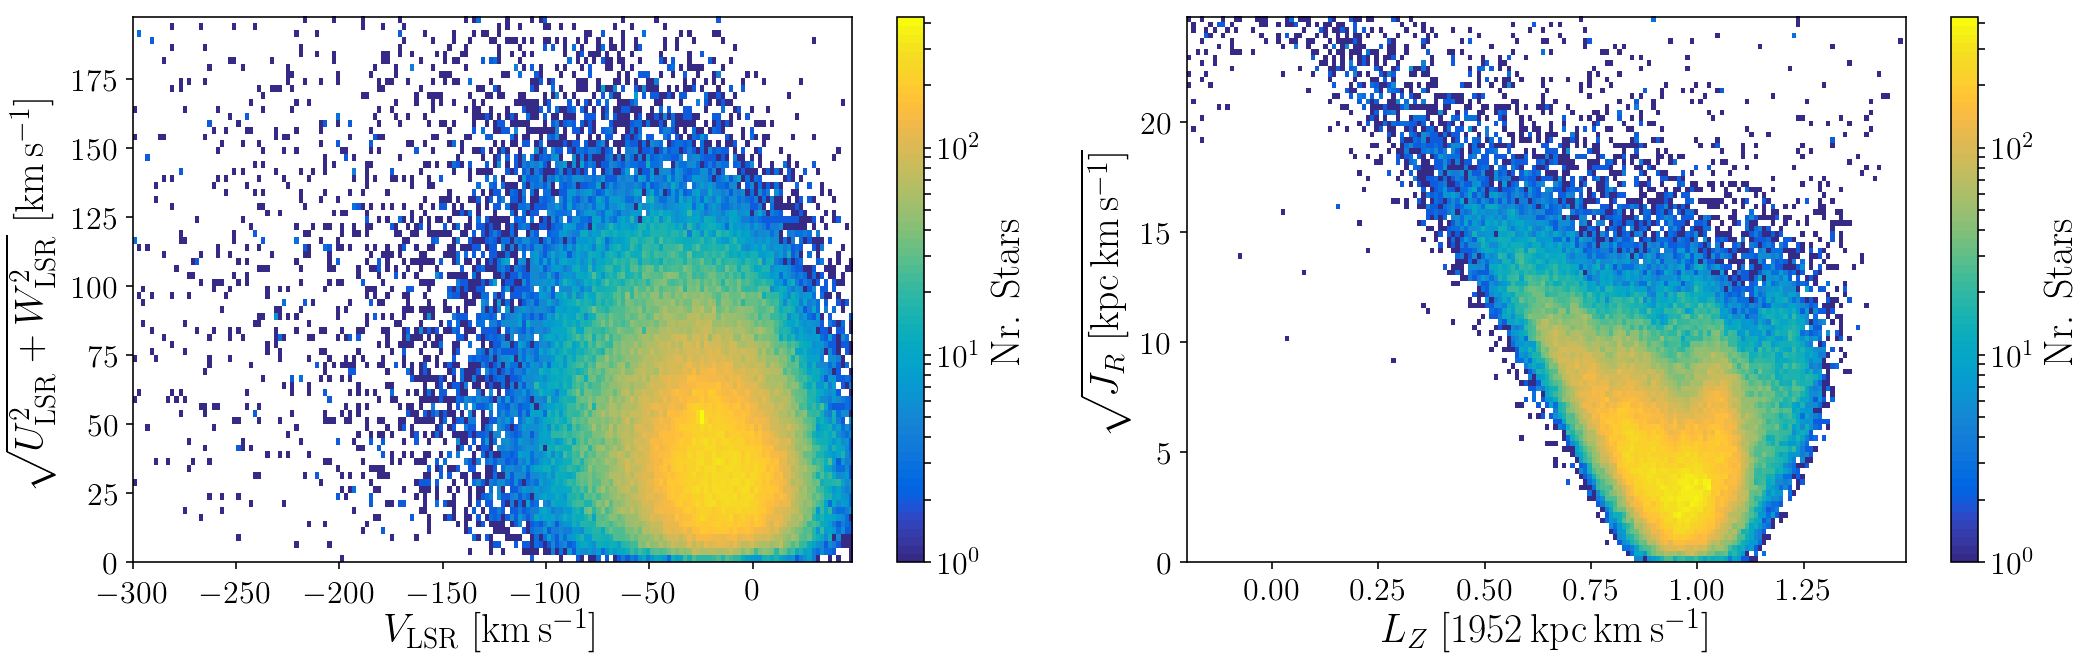

In [36]:
# Plot clean sample

good_dynamics = (
    (sobject_iraf['r_est'] > 600) & (sobject_iraf['r_est'] < 1500) & 
    np.isfinite(dynamics['L_Z']) & 
    #(sobject_iraf['astrometric_excess_noise_sig'] < 1) & 
    (np.sqrt(sobject_iraf['e_rv_guess']**2. + 0.1**2.) < 0.5) & 
    (np.abs(sobject_iraf['pmra_error']/sobject_iraf['pmra']) < 0.2) & 
    (np.abs(sobject_iraf['pmdec_error']/sobject_iraf['pmdec']) < 0.2)& 
    (np.abs(sobject_iraf['parallax_error']/sobject_iraf['parallax']) < 0.2)
    )

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

kwargs_hist2d = dict(
    cmin=1,
    cmap=parula,
    norm=LogNorm(),
    rasterized=True
    )

p1, x1, y1, s1 = ax1.hist2d(
    dynamics['V_LSR'][good_dynamics],
    np.sqrt(dynamics['U_LSR'][good_dynamics]**2. + dynamics['W_LSR'][good_dynamics]**2.),
    bins = (
        np.arange(-300,50,2),
        np.arange(0,200,2.5)
    ),
    **kwargs_hist2d
    )
c1 = plt.colorbar(s1, ax=ax1)
c1.set_label('Nr. Stars')

p2, x2, y2, s2 = ax2.hist2d(
    dynamics['L_Z'][good_dynamics]/(_REFR0*_REFV0),
    np.sqrt(dynamics['J_R'][good_dynamics]),
    bins = (
        np.arange(-0.2,1.5,0.01),
        np.arange(0,25,0.25)
    ),
    **kwargs_hist2d
    )
c2 = plt.colorbar(s2, ax=ax2)
c2.set_label('Nr. Stars')

# ellipse = matplotlib.patches.Ellipse(xy = (-1.5,3150), width = 0.7, height = 1000, angle = 0.05, lw = 3, fc='None', edgecolor = 'r')
# ax1.add_artist(ellipse)
# ax1.text(0.26,0.7,'LMC',transform=ax1.transAxes,color='r',fontsize=20)

ax1.set_xlabel(r'$V_\text{LSR}~\mathrm{[km\,s^{-1}]}$')
ax1.set_ylabel(r'$\sqrt{U_\text{LSR}^2 + W_\text{LSR}^2}~\mathrm{[km\,s^{-1}]}$')
ax2.set_xlabel(r'$L_Z~\mathrm{[1952\,kpc\,km\,s^{-1}]}$')
ax2.set_ylabel(r'$\sqrt{J_R~\mathrm{[kpc\,km\,s^{-1}]}}$')

plt.tight_layout()
plt.savefig('figures/action_overview_clean_600_1500pc.png',dpi=300)

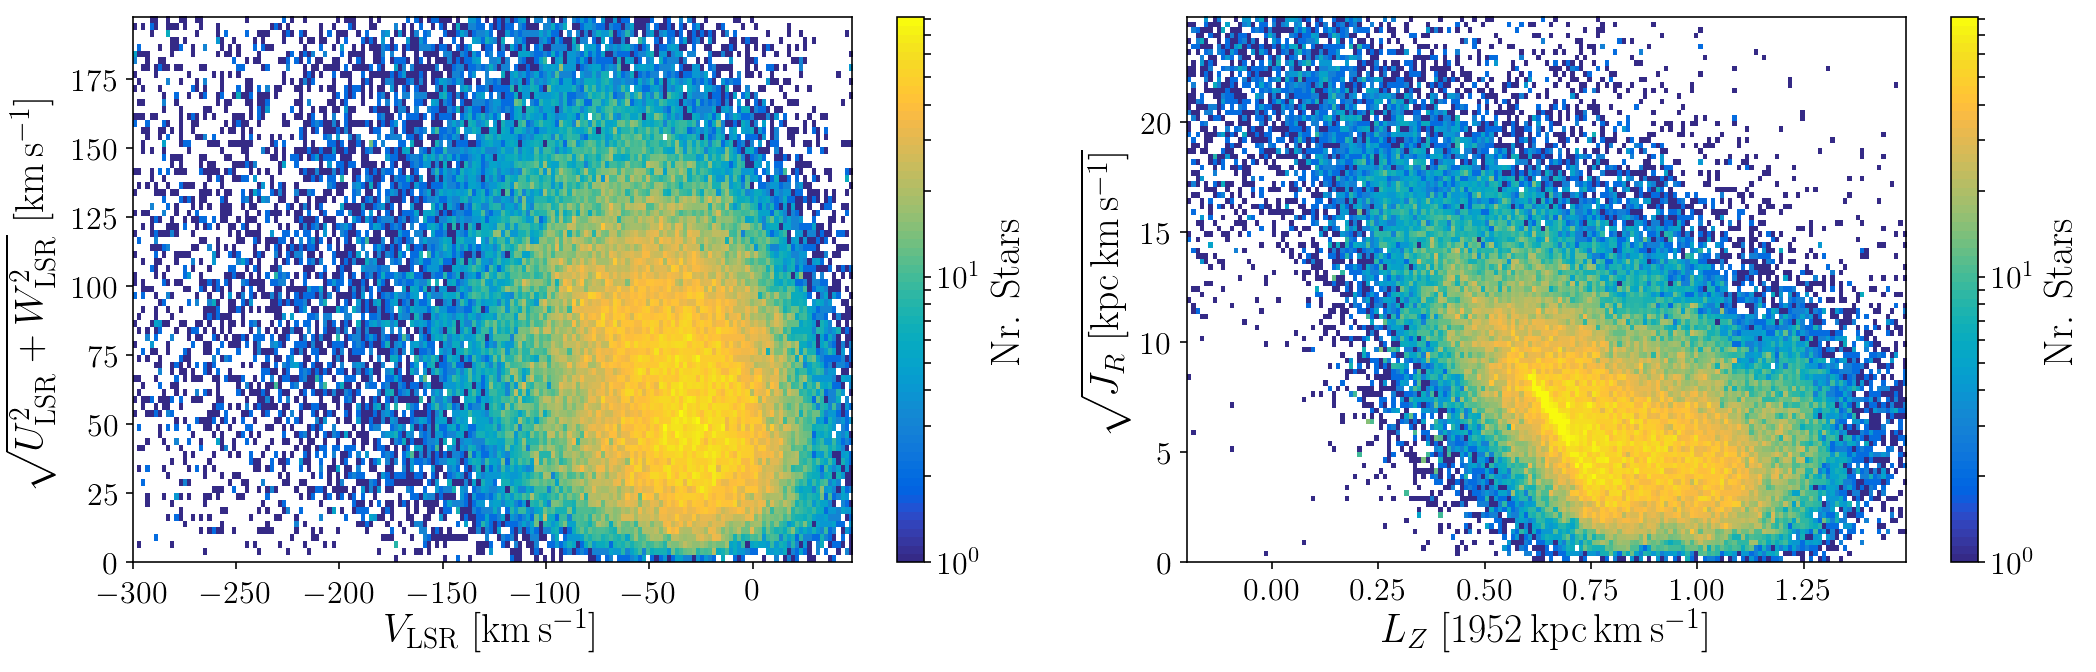

In [37]:
# Plot clean sample

good_dynamics = (
    (sobject_iraf['r_est'] > 1500) &
    np.isfinite(dynamics['L_Z']) & 
    #(sobject_iraf['astrometric_excess_noise_sig'] < 1) & 
    (np.sqrt(sobject_iraf['e_rv_guess']**2. + 0.1**2.) < 0.5) & 
    (np.abs(sobject_iraf['pmra_error']/sobject_iraf['pmra']) < 0.2) & 
    (np.abs(sobject_iraf['pmdec_error']/sobject_iraf['pmdec']) < 0.2)& 
    (np.abs(sobject_iraf['parallax_error']/sobject_iraf['parallax']) < 0.2)
    )

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

kwargs_hist2d = dict(
    cmin=1,
    cmap=parula,
    norm=LogNorm(),
    rasterized=True
    )

p1, x1, y1, s1 = ax1.hist2d(
    dynamics['V_LSR'][good_dynamics],
    np.sqrt(dynamics['U_LSR'][good_dynamics]**2. + dynamics['W_LSR'][good_dynamics]**2.),
    bins = (
        np.arange(-300,50,2),
        np.arange(0,200,2.5)
    ),
    **kwargs_hist2d
    )
c1 = plt.colorbar(s1, ax=ax1)
c1.set_label('Nr. Stars')

p2, x2, y2, s2 = ax2.hist2d(
    dynamics['L_Z'][good_dynamics]/(_REFR0*_REFV0),
    np.sqrt(dynamics['J_R'][good_dynamics]),
    bins = (
        np.arange(-0.2,1.5,0.01),
        np.arange(0,25,0.25)
    ),
    **kwargs_hist2d
    )
c2 = plt.colorbar(s2, ax=ax2)
c2.set_label('Nr. Stars')

# ellipse = matplotlib.patches.Ellipse(xy = (-1.5,3150), width = 0.7, height = 1000, angle = 0.05, lw = 3, fc='None', edgecolor = 'r')
# ax1.add_artist(ellipse)
# ax1.text(0.26,0.7,'LMC',transform=ax1.transAxes,color='r',fontsize=20)

ax1.set_xlabel(r'$V_\text{LSR}~\mathrm{[km\,s^{-1}]}$')
ax1.set_ylabel(r'$\sqrt{U_\text{LSR}^2 + W_\text{LSR}^2}~\mathrm{[km\,s^{-1}]}$')
ax2.set_xlabel(r'$L_Z~\mathrm{[1952\,kpc\,km\,s^{-1}]}$')
ax2.set_ylabel(r'$\sqrt{J_R~\mathrm{[kpc\,km\,s^{-1}]}}$')

plt.tight_layout()
plt.savefig('figures/action_overview_clean_1500pc.png',dpi=300)